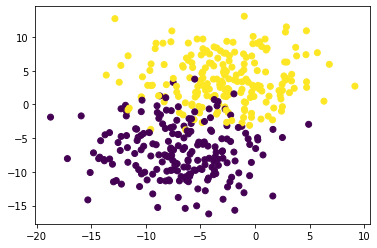

In [175]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X,y = make_blobs(400,2,centers = 2,random_state = 66,cluster_std = 4)
y_sk = y
y = y[:,np.newaxis]
beta = np.array([0,0,0])[:,np.newaxis]

X_w = np.concatenate([np.ones(shape = [len(X),1]),X],axis = 1)

plt.scatter(X[:,0],X[:,1],c = y)


Our Log-Likelihood function is as follows:

$$L(x,y) =  \sum_{i=0}^{m}y_ilog(h(x)) - (1-y)log(1-h(x))$$

In matrix form:

$$L = y^TX\beta + u^T@log(1/(1+e^{-X\beta}))$$

where $u$ is a vector on ones of length $m$.

The derivative $\frac{dL}{d\beta}$ in matrix form which will be used in our gradient descent is as follows:

$$\frac{dL}{d\beta} = -X^T(y-(1/(1+e^{-X\beta}))$$

This lastly leads us to the following update rule:

$$\beta_{i+1} = \beta_{i} - \rho*\frac{dL}{d\beta}_i$$

In [176]:
#Lets plot our loss function value as a function of the iteration to check if our gradient descent is working!
xs = []
losses = []
errors = []

u = np.ones(shape = [len(X_w),1])

def sigmoid(M):
    return (1/(1+np.exp(-M)))

for i in range(0,1000):
    
    log_like = y.T@X_w@beta + u.T@np.log(sigmoid(-X_w@beta))
    log_deriv = X_w.T@(y-sigmoid(X_w@beta))
    beta = beta + 0.001*log_deriv
    loss = 1/len(X_w) * np.sum(-y.T@sigmoid(X_w@beta)) - (1-y.T)@(sigmoid(X_w@beta))
    err = np.sum(np.square(y - sigmoid(X_w@beta)))
    
    xs.append(i)
    errors.append(err)
    losses.append(loss)
                               

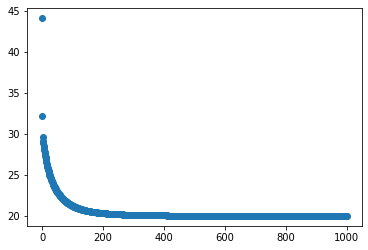

In [177]:
plt.scatter(xs,errors)

In [178]:
from sklearn.linear_model import LogisticRegression

mod = LogisticRegression()
mod.fit(X,y_sk)

sklearn_coeff = [i for i in mod.coef_.reshape(mod.coef_.shape[1])]
sklearn_coeff.append(mod.intercept_[0])

our_coeff = beta[[1,2,0],0]
print('sklearn Coefficients: {}\n'.format(sklearn_coeff))



print('Our Coefficients:\n{}'.format(our_coeff))


sklearn Coefficients: [0.24954258183653522, 0.8179307890082089, 2.2664166347464154]

Our Coefficients:
[0.25149815 0.82652694 2.28429105]
